In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
# from haloclustering.data import get_combined_dataset
from scipy.stats import binned_statistic
from haloclustering import models
from haloclustering import data as datamodule
from haloclustering.plot import CovFracPlot
from haloclustering import plot as cplot

from casbah import cgm
import matplotlib
matplotlib.rcParams['font.serif'] = "DejaVu Serif"
matplotlib.rcParams['font.family'] = "serif"

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 16
np.random.seed(42)

### read in data

In [3]:
cgmsqfile = "/Users/mwilde/python/cgm-squared/cgmsquared/data/cgm/cgmsquared_cgmsurvey_aodm_vhalos10_3sigma.json"
casdir = "/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_*.fits"
#data_lo = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=7, M_max=9.204)
#data_mid = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=9.204, M_max=9.888)
#data_hi = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=9.888, M_max=17.)
data = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=7, M_max=17)


read_sets: Using set file -- 
  /Users/mwilde/python/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 441
misses 1616
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 85
misses 102
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 520
misses 2096
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 92
misses 93
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 428
misses 1797
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 91
misses 96
Load

# Model comparison with all masses

the uncertainty here is the intrabin spread
* TODO: plot fraction of time no crossing of R21 as mass 
* ~~TODO: add 1-halo, 2-aho model to these plots~~
* ~~TODO: check rho_min comoving~~
* ~~TODO: mark uncertainty on the model by sampling from the parameters~~
* ~~TODO: try fill_between~~
* ~~TODO: add a beta_2h term to the 2h only model - detect mass dep. at large radii??~~
* ~~TODO: try fit to >2Mpc vs 5Mpc  vs 10Mpc~~



## insantiate the models with data and respective sampler

In [45]:
# bin up the covering fraction data in rho_impact
bins = np.logspace(-1, 1.3, 13)
bincenters = (bins[:-1] + bins[1:]) / 2
mass = data[2]

In [44]:
data[1][data[3] | data[4]].shape, data[1].shape, data_hi[0].shape, data[2][data[2] > 10**9.888]

((7457,), (7457,), (2412,), (2412,), (1, 7457))

# Plot model comparison in mass bins

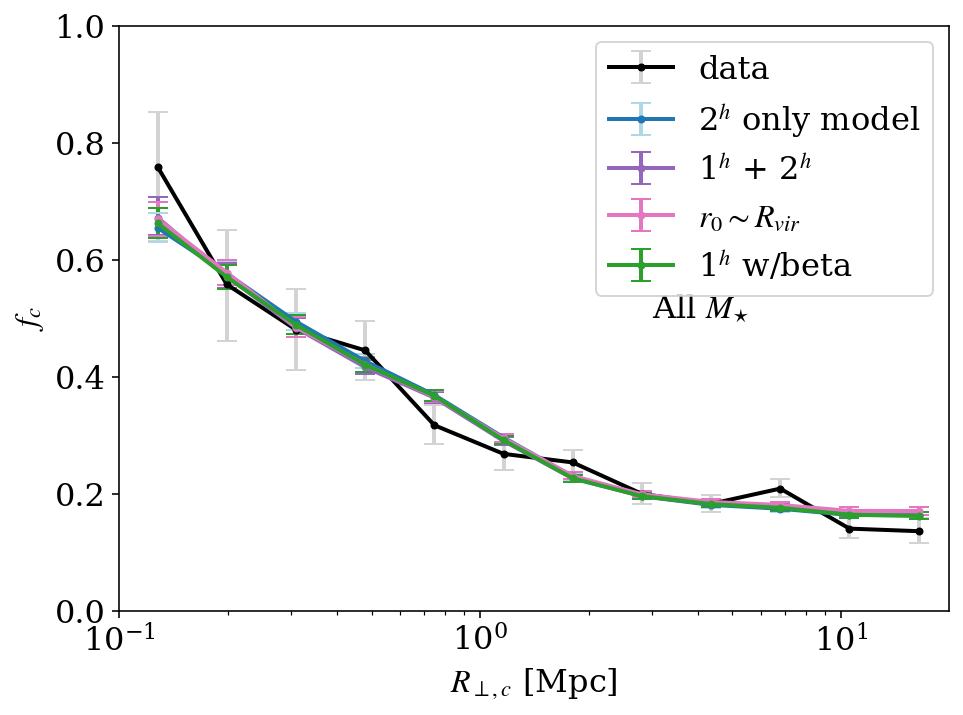

In [30]:
cplot.plot_fc(data, bins, "model_comparison_allmass_all_radii.png", r"All $M_{\star}$")

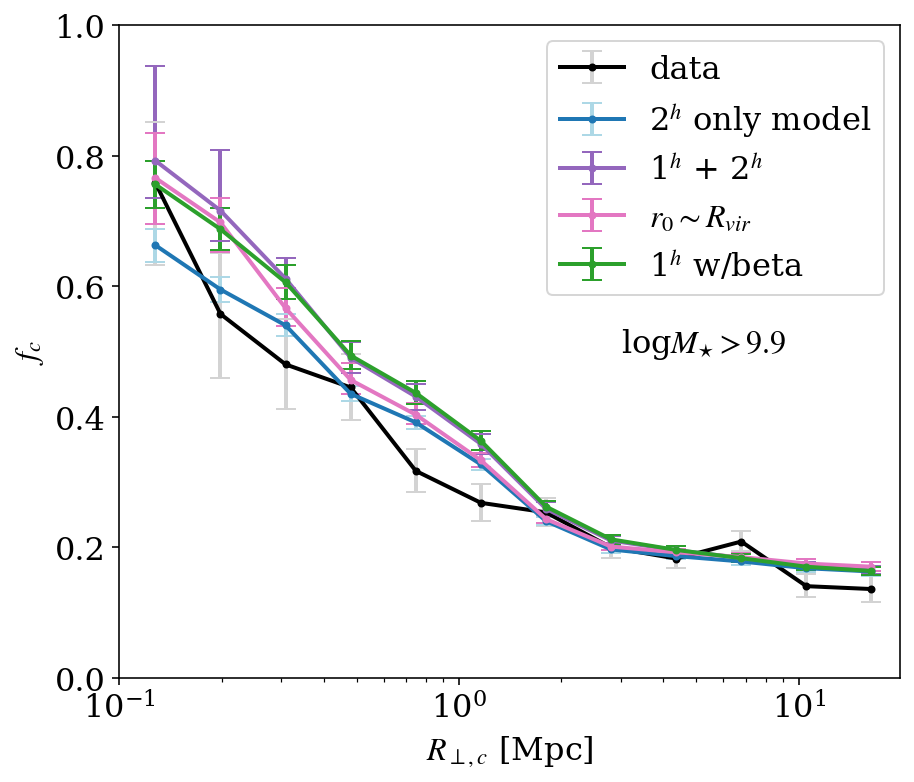

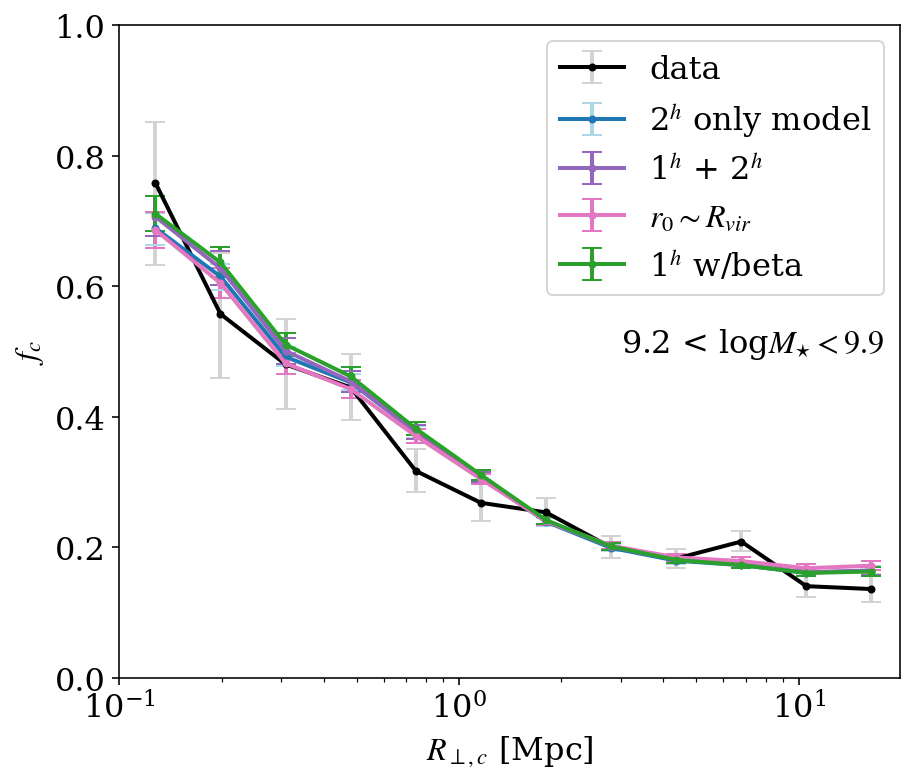

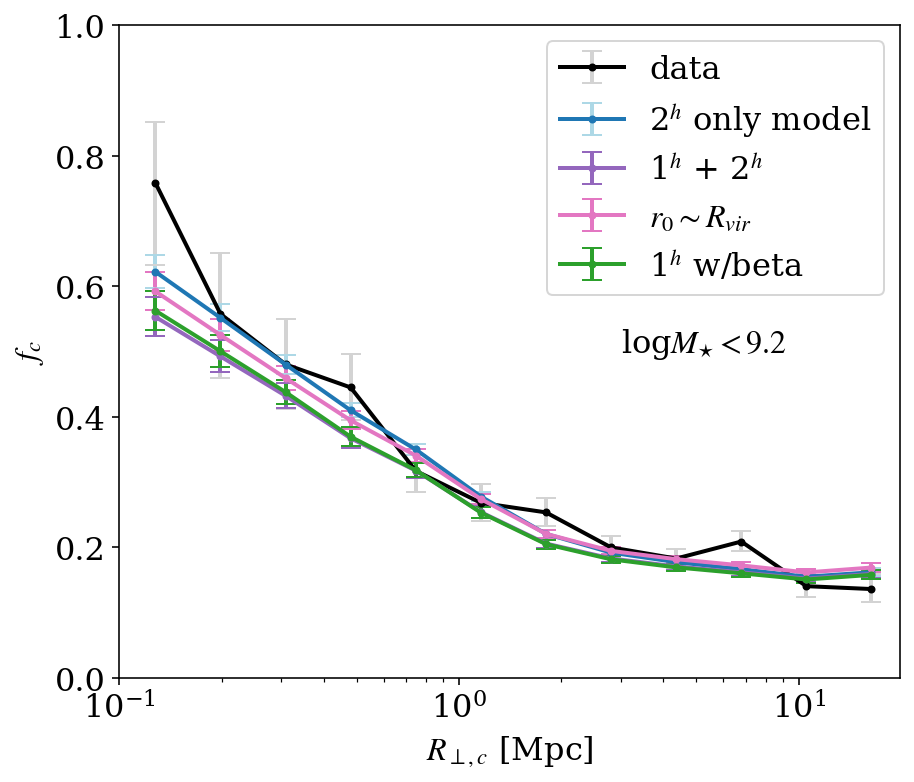

In [65]:
mass_cut_hi = mass > 10**9.888
mass_cut_mid = (mass < 10**9.888) & (mass > 10**9.204)
mass_cut_low = (mass < 10**9.204) & (mass > 10**7)
fig, ax = plt.subplots(figsize=(7, 6))
ax1 = cplot.plot_fc(ax, data, bins, "model_comparison_himass.png", r"log$M_{\star} > 9.9$", rerun_fc=False, mass_cut=mass_cut_hi)
fig, ax = plt.subplots(figsize=(7, 6))
ax2 = cplot.plot_fc(ax, data, bins, "model_comparison_midmass.png", r"9.2 < log$M_{\star} < 9.9$", rerun_fc=False, mass_cut=mass_cut_mid)
fig, ax = plt.subplots(figsize=(7, 6))
ax3 = cplot.plot_fc(ax, data, bins, "model_comparison_lowmass.png", r"log$M_{\star} < 9.2$", rerun_fc=False, mass_cut=mass_cut_low)

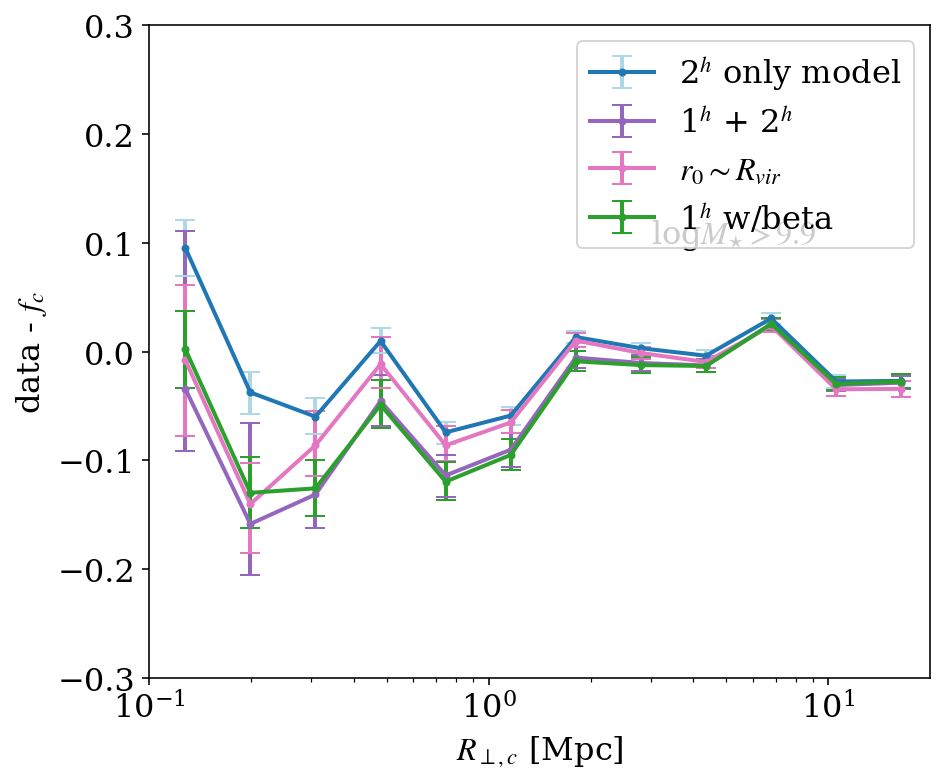

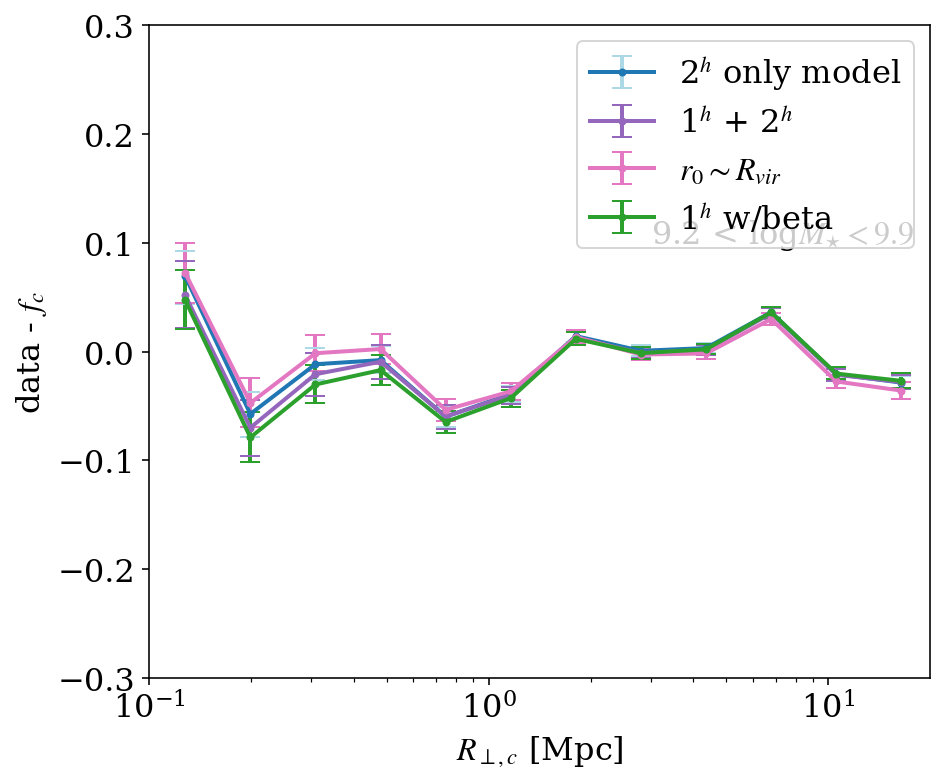

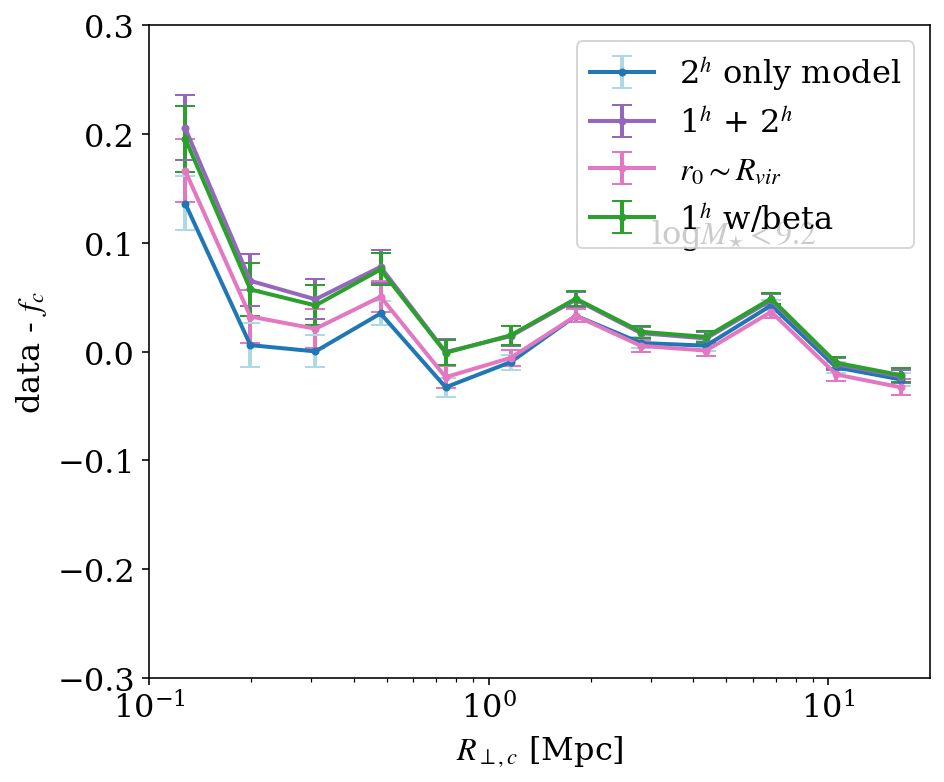

In [69]:
fig, ax = plt.subplots(figsize=(7, 6))
ax1 = cplot.plot_fc_diff(ax, data, bins, "model_comparison_himass.png", r"log$M_{\star} > 9.9$", rerun_fc=False, mass_cut=mass_cut_hi)
fig, ax = plt.subplots(figsize=(7, 6))
ax2 = cplot.plot_fc_diff(ax, data, bins, "model_comparison_midmass.png", r"9.2 < log$M_{\star} < 9.9$", rerun_fc=False, mass_cut=mass_cut_mid)
fig, ax = plt.subplots(figsize=(7, 6))
ax3 = cplot.plot_fc_diff(ax, data, bins, "model_comparison_lowmass.png", r"log$M_{\star} < 9.2$", rerun_fc=False, mass_cut=mass_cut_low)

# what about adding the one and 2 halo components a la the r21 schematic?

Thoughts on this: 
* this requires computing phit_1halo, phit_2halo, in addtion to phit_sum, then doing this binned statistic as a function of $R_{\perp}$
* maybe better to do this with grid data instead of the real data 
* these all could be aided by computing the covering fraction for the data as part of the model, like `Model.calc_phit(data)`
* dont I already do this?